## KNN Classifier

In [141]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset Review
cancer = load_breast_cancer()

df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df["target"] = cancer["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing the model - KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

In [76]:
# Evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.49%


In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 60   3]
 [  3 105]]


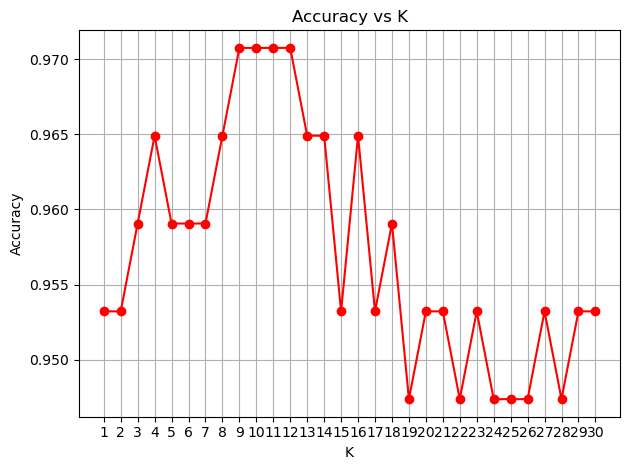

Best K: 9, Accuracy: 97.08%


In [99]:
# Hyperparameter Tuning
accuracy_list = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

best_k = np.argmax(accuracy_list)

plt.plot(range(1, 31), accuracy_list, marker="o", color="red")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(range(1, 31))
plt.title("Accuracy vs K")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best K: {best_k + 1}, Accuracy: {accuracy_list[best_k] * 100:.2f}%")

## KNN Regressor

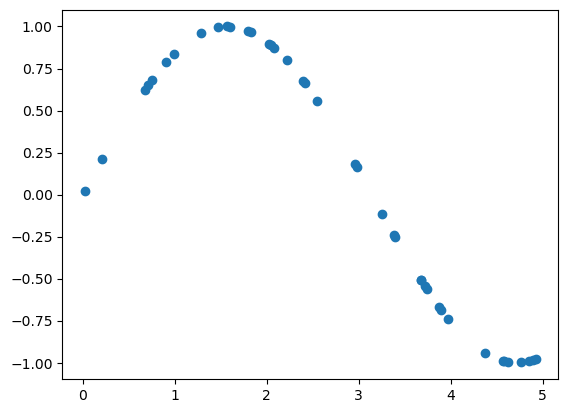

In [119]:
X = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(X).ravel()

plt.scatter(X, y);

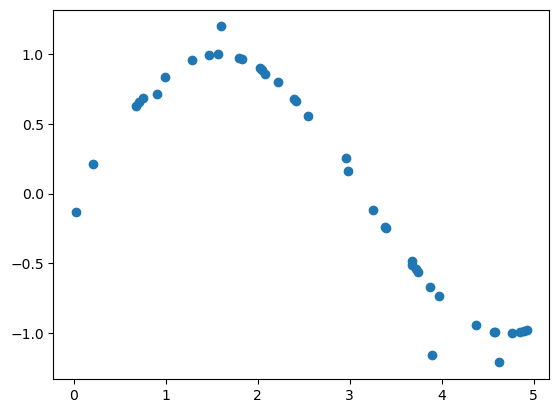

In [120]:
# Add noise to the data
y[::5] += 1 * (0.5 - np.random.rand(8))
plt.scatter(X, y);

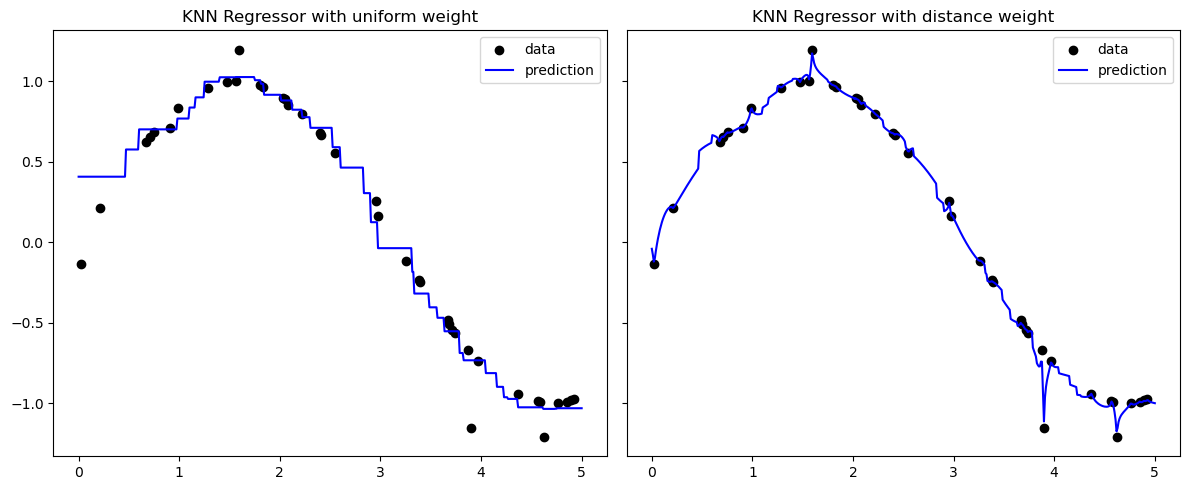

In [ ]:
T = np.linspace(0, 5, 500)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for i, weight in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    knn.fit(X, y)
    y_pred = knn.predict(T)

    axes[i].scatter(X, y, color="black", label="data")
    axes[i].plot(T, y_pred, color="blue", label="prediction")
    axes[i].set_title(f"KNN Regressor with {weight} weight")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [142]:
T_new = np.linspace(0, 5, 40)[:, np.newaxis]

knn_new = KNeighborsRegressor(n_neighbors=5, weights="distance")
knn_new.fit(X, y)
y_pred = knn_new.predict(T_new)

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0451


In [143]:
knn_new = KNeighborsRegressor(n_neighbors=5, weights="uniform")
knn_new.fit(X, y)
y_pred = knn_new.predict(T_new)

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0503


You can do hyperparameter tuning if you want, like the above. Distance weight is better than uniform weight according to MSE.